<a href="https://colab.research.google.com/github/pdthang26/Artificial-Intellignece-ST7-1234/blob/EXERCISE/Cifar100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import cifar100
(x_train,y_train), (x_test,y_test)= cifar100.load_data()

169001437/169001437 [==============================] - 3s 0us/step


In [2]:
x_train.shape

(50000, 32, 32, 3)

In [3]:
x_test.shape

(10000, 32, 32, 3)

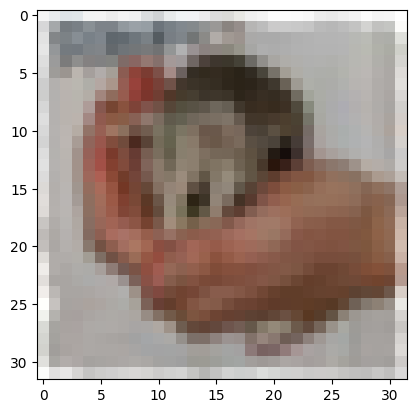

In [4]:
import matplotlib.pyplot as plt
thing = x_train[26]
plt. imshow(thing, cmap = plt.cm.binary)
plt.show()
# print('so:', x_train[26])

<ipython-input-5-e961ff48b209>:3: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


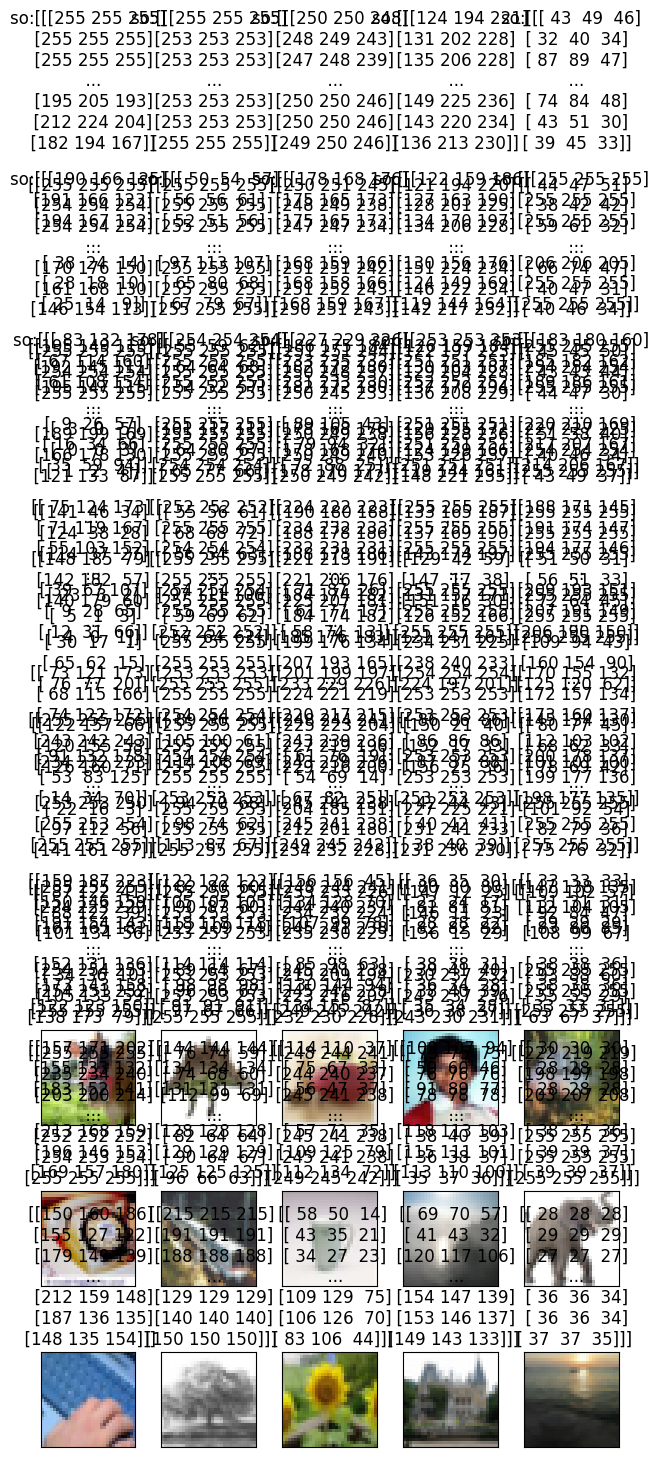

In [5]:
for i in range (15):
  plt.subplot(3,5,i+1)
  plt.tight_layout()
  plt.imshow(x_train[i], cmap= 'gray',interpolation='none')
  plt.title('so:{} '.format(x_train[i]))
  plt.xticks([])
  plt.yticks([])

In [6]:
from keras.models import Sequential
from keras.layers import Dense

model=Sequential()
model.add(Dense(10000,activation = 'relu', input_shape = (32*32*3,)))
model.add(Dense(7000,activation = 'relu'))
model.add(Dense(1000,activation = 'relu'))
model.add(Dense(100,activation = 'softmax'))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10000)             30730000  
                                                                 
 dense_1 (Dense)             (None, 7000)              70007000  
                                                                 
 dense_2 (Dense)             (None, 1000)              7001000   
                                                                 
 dense_3 (Dense)             (None, 100)               100100    
                                                                 
Total params: 107,838,100
Trainable params: 107,838,100
Non-trainable params: 0
_________________________________________________________________


In [7]:
X= x_test
y= y_test

In [8]:
x_train = x_train.reshape(50000,32*32*3)
x_train = x_train.astype('float32')/255
x_test = x_test.reshape(10000,32*32*3)
x_test = x_test.astype('float32')/255

In [9]:
print(x_test.shape)
print(x_train.shape)

(10000, 3072)
(50000, 3072)


In [10]:
from keras.utils import to_categorical

y_train = to_categorical(y_train,100)
y_test = to_categorical(y_test,100)

In [11]:
model.compile(optimizer = "rmsprop", loss = 'categorical_crossentropy', metrics= 'accuracy')
model.fit(x_train, y_train, epochs = 10, batch_size =128)
test_loss, test_acc = model.evaluate(x_test, y_test)
print("loss;" , test_loss)
print("Accuracy:", test_acc)

Epoch 1/10
391/391 [==============================] - 18s 29ms/step - loss: 4.6836 - accuracy: 0.0475
Epoch 2/10
391/391 [==============================] - 11s 29ms/step - loss: 3.9152 - accuracy: 0.0969
Epoch 3/10
391/391 [==============================] - 11s 29ms/step - loss: 3.6944 - accuracy: 0.1319
Epoch 4/10
391/391 [==============================] - 12s 30ms/step - loss: 3.5567 - accuracy: 0.1563
Epoch 5/10
391/391 [==============================] - 12s 30ms/step - loss: 3.4472 - accuracy: 0.1769
Epoch 6/10
391/391 [==============================] - 12s 30ms/step - loss: 3.3505 - accuracy: 0.1923
Epoch 7/10
391/391 [==============================] - 12s 30ms/step - loss: 3.2629 - accuracy: 0.2101
Epoch 8/10
391/391 [==============================] - 12s 31ms/step - loss: 3.1900 - accuracy: 0.2230
Epoch 9/10
391/391 [==============================] - 12s 30ms/step - loss: 3.1095 - accuracy: 0.2360
Epoch 10/10
313/313 [==============================] - 2s 5ms/step - loss: 3.3451 

In [12]:
model.save("test.h5")

In [13]:
from keras.utils import load_img

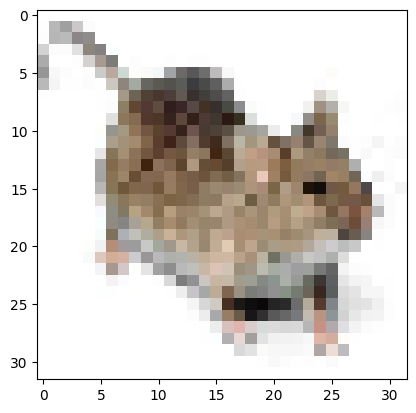

1/1 [==============================] - 0s 34ms/step


array([29])

In [17]:
from keras.utils.image_utils import img_to_array
url='/content/drive/MyDrive/280px-Mouse_white_background.jpg'

img = load_img(url, target_size= (32,32))
plt. imshow(img, cmap = plt.cm.binary)
plt.show()
img = img_to_array(img)
img = img.reshape(1,32*32*3)
img = img.astype('float32')/255

import numpy as np

ketqua=np.argmax(model.predict(img), axis = 1)
ketqua